# Загрузка и предобработка данных

In [157]:
#!pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pickle
import sklearn

# Модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix
import keras

from datetime import datetime as dt

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
df = pd.read_csv('SF_Mandarin_dataset_ver3_csv.csv', delimiter=';')

In [160]:
df

,SkillFactory_Id,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,...,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Loan_amount,Loan_term,Goods_category
0,1.0,1988-07-21 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013-09-01 00:00:00.0000000,начальник п,180000.0,90000.0,0.0,...,0.0,success,success,success,success,denied,77.0,137000.0,18.0,Furniture
1,2.0,1998-01-16 00:00:00.0000000,Высшее - специалист,Собственное дело,1 - 2 года,2022-12-01 00:00:00.0000000,директор,200000.0,60000.0,0.0,...,0.0,success,denied,success,denied,success,27.0,33000.0,6.0,Fitness
2,3.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,denied,denied,success,success,success,19.0,165000.0,24.0,Medical_services
3,4.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,34.0,67000.0,12.0,Education
4,5.0,1972-10-02 00:00:00.0000000,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005-12-01 00:00:00.0000000,ДИРЕКТОР,300000.0,45000.0,1.0,...,0.0,success,denied,success,success,success,75.0,36000.0,6.0,Furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Пустые строки

Проверяем наличие пустых значений

In [161]:
df.isnull().sum()

SkillFactory_Id      2184
BirthDate            2184
education            2184
employment status    2184
Value                2264
JobStartDate         2293
Position             2293
MonthProfit          2184
MonthExpense         2184
Gender               2221
Family status        2221
ChildCount           2221
SNILS                2184
BankA_decision       2184
BankB_decision       2184
BankC_decision       2184
BankD_decision       2184
BankE_decision       2184
Merch_code           2184
Loan_amount          2184
Loan_term            2184
Goods_category       2184
dtype: int64

Убираем строки с пустыми значениями

In [162]:
df.dropna(inplace=True)

Проверяем корректность отработки

In [163]:
df.isnull().sum()

SkillFactory_Id      0
BirthDate            0
education            0
employment status    0
Value                0
JobStartDate         0
Position             0
MonthProfit          0
MonthExpense         0
Gender               0
Family status        0
ChildCount           0
SNILS                0
BankA_decision       0
BankB_decision       0
BankC_decision       0
BankD_decision       0
BankE_decision       0
Merch_code           0
Loan_amount          0
Loan_term            0
Goods_category       0
dtype: int64

## Предобработка данных

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6464 entries, 0 to 6602
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SkillFactory_Id    6464 non-null   float64
 1   BirthDate          6464 non-null   object 
 2   education          6464 non-null   object 
 3   employment status  6464 non-null   object 
 4   Value              6464 non-null   object 
 5   JobStartDate       6464 non-null   object 
 6   Position           6464 non-null   object 
 7   MonthProfit        6464 non-null   float64
 8   MonthExpense       6464 non-null   float64
 9   Gender             6464 non-null   float64
 10  Family status      6464 non-null   object 
 11  ChildCount         6464 non-null   float64
 12  SNILS              6464 non-null   float64
 13  BankA_decision     6464 non-null   object 
 14  BankB_decision     6464 non-null   object 
 15  BankC_decision     6464 non-null   object 
 16  BankD_decision     6464 

Столец `SkillFactory_Id` не содержит значимой информации - можем удалить его

In [165]:
df.drop('SkillFactory_Id', axis=1, inplace= True)

Удалим одинаковые строки

In [166]:
df.drop_duplicates(inplace= True)

Проверим сколько строк было удалено

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6464 entries, 0 to 6602
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BirthDate          6464 non-null   object 
 1   education          6464 non-null   object 
 2   employment status  6464 non-null   object 
 3   Value              6464 non-null   object 
 4   JobStartDate       6464 non-null   object 
 5   Position           6464 non-null   object 
 6   MonthProfit        6464 non-null   float64
 7   MonthExpense       6464 non-null   float64
 8   Gender             6464 non-null   float64
 9   Family status      6464 non-null   object 
 10  ChildCount         6464 non-null   float64
 11  SNILS              6464 non-null   float64
 12  BankA_decision     6464 non-null   object 
 13  BankB_decision     6464 non-null   object 
 14  BankC_decision     6464 non-null   object 
 15  BankD_decision     6464 non-null   object 
 16  BankE_decision     6464 

Как видим, дубликатов в датасете не оказалось

## Предварительный анализ данных

In [168]:
df.describe()

,MonthProfit,MonthExpense,Gender,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term
count,6.464000e+03,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,1.495216e+05,25739.983137,0.309097,0.090037,0.346380,38.787593,76153.155941,12.093750
std,7.600070e+04,20301.771239,0.462157,0.407951,0.475853,23.895536,50926.107415,5.989045
min,5.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,4000.000000,6.000000
25%,1.000000e+05,15000.000000,0.000000,0.000000,0.000000,18.000000,35000.000000,6.000000
50%,1.480000e+05,22500.000000,0.000000,0.000000,0.000000,36.000000,67000.000000,12.000000
75%,1.900000e+05,30000.000000,1.000000,0.000000,1.000000,63.000000,100000.000000,18.000000
max,1.200000e+06,500000.000000,1.000000,5.000000,1.000000,80.000000,200000.000000,24.000000


Построим матрицу корреляции.

Для этого заменим текстовые значения целевых переменных на числовые

In [169]:
df = df.replace({'success': 1, 'denied': 0, 'error': 2})

<ipython-input-170-10294f90bef1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

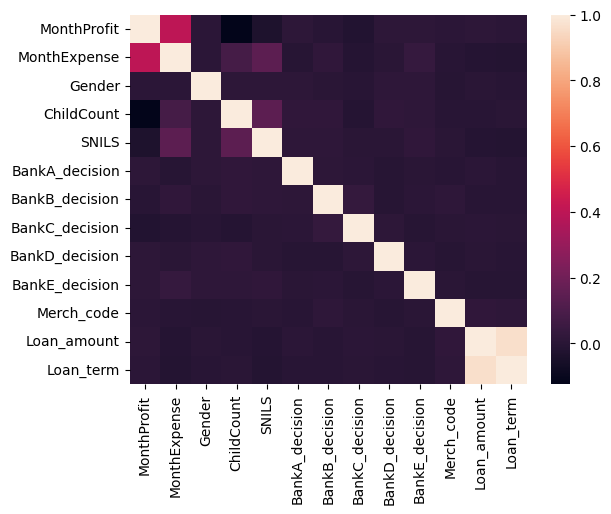

In [170]:

corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Видим интересную картину - целевые переменные никаким образом не скоррелированы с остальными признаками!

Визцальный анализ данных также подтверждает это - явно влияющих на одобрение либо отказ банком признаков - нет

При этом есть зависимости месячного дохода и расхода (что логично - чем больше у человека доход, тем скорее всего у него выше и расходы)

Также видим сильную корреляцию суммы ссуды и ее срока, в чем также есть смысл - большие суммы обычно запрашивают на более длительные сроки

# Feature engineering

Начнем формирование фич для дальнейшего обучения модели

## Возраст Клиента

Первая фича, которая должна оказывать значительное влияние на принятие банком решения - возрас Клиента.

Вычислим его на основании даты рождения Клиента, имеющейся в датасете

In [171]:
# Переводим дату рождения заемщика в количество полных лет
df['BirthDate'] = pd.to_datetime(df['BirthDate'])

# Вычисление возраста и сохранение в новом столбце Age
df['Age'] = (pd.to_datetime('today') - df['BirthDate']).astype('<m8[Y]')

# Удаляем лишние столбцы
df.drop('BirthDate', axis=1, inplace= True)

## Образование

На текущем этапе столбец с образованием Клиента можем оставить без предварительной обработки

In [172]:
df['education'].value_counts()

Высшее - специалист         5258
Среднее профессиональное     443
Неоконченное высшее          215
Среднее                      194
Бакалавр                     144
Несколько высших             109
Магистр                       71
Неоконченное среднее          26
MBA                            3
Ученая степень                 1
Name: education, dtype: int64

## Статус трудоустройства

На текущем этапе столбец со статусом трудоустройства Клиента можем оставить без предварительной обработки

In [173]:
df['employment status'].value_counts()

Работаю по найму полный рабочий день/служу    4843
Собственное дело                              1516
Работаю по найму неполный рабочий день          61
Декретный отпуск                                19
Пенсионер                                       15
Не работаю                                       8
Студент                                          2
Name: employment status, dtype: int64

## Общий стаж работы Клиента

В данном поле у виде категорий указывается общий стаж работы клиента.

Пока оставим это поле в изначальном виде

In [174]:
df['Value'].value_counts()

10 и более лет       3605
3 - 4 года            521
2 - 3 года            498
4 - 5 лет             366
5 - 6 лет             289
1 - 2 года            269
6 - 7 лет             250
7 - 8 лет             225
8 - 9 лет             152
6 месяцев - 1 год     118
9 - 10 лет             88
4 - 6 месяцев          51
менее 4 месяцев        32
Name: Value, dtype: int64

## Стаж на последнем месте работы

Также на принятие решения Банком о кредитовании Клиента влияет стаж Клиента, добавим соответствующую фичу

In [175]:
# Переводим дату начала рабочего стажа в кол-во лет
df['JobStartDate'] = pd.to_datetime(df['JobStartDate'])

df['Seniority'] = (pd.to_datetime('today') - df['JobStartDate']).astype('<m8[Y]')

# Удаляем лишние столбцы
df.drop(['JobStartDate', 'Value'], axis=1, inplace= True)

## Должность Клиента

С признаком `Position` есть трудности - часто одни и те же должности написаны различными способами.

По комментариям Заказчика данный столбец не влияет на принятие решения Банками, поэтому использовать его не будем.

## Пол

В поле `Gender` произведем замену числовых значений на категориальные, чтобы в дальнейшем сделать One-hot encoding

In [176]:
df['Gender'].value_counts()

0.0    4466
1.0    1998
Name: Gender, dtype: int64

In [177]:
df.loc[df['Gender'] == 0, 'Gender'] = 'Male'
df.loc[df['Gender'] == 1, 'Gender'] = 'Female'

data_types_dict = {'Gender': str}
df = df.astype(data_types_dict)
df.dtypes

df['Gender'].value_counts()

Male      4466
Female    1998
Name: Gender, dtype: int64

## Семейное положение

Аналогично с полем `Family status`

In [178]:
df['Family status'].value_counts()

Никогда в браке не состоял(а)               4383
Женат / замужем                             1474
Разведён / Разведена                         462
Гражданский брак / совместное проживание      97
Вдовец / вдова                                48
Name: Family status, dtype: int64

## Количество детей

Поле `ChildCount` сделаем категориальным

In [179]:
df['ChildCount'].value_counts()

0.0    6102
1.0     186
2.0     140
3.0      29
4.0       6
5.0       1
Name: ChildCount, dtype: int64

In [180]:
data_types_dict = {'ChildCount': str}
df = df.astype(data_types_dict)

## Наличие СНИЛС

Поле `SNILS` представляет из себя странную фичу - кажется, оно не должно оказывать влияние на принятие решения банком - перед окончательным формированием фич примем решение о его использовании

В любом случае приведем его к категориальному виду

In [181]:
df['SNILS'].value_counts()

0.0    4225
1.0    2239
Name: SNILS, dtype: int64

In [182]:
df.loc[df['SNILS'] == 0, 'SNILS'] = 'Empty'
df.loc[df['SNILS'] == 1, 'SNILS'] = 'Not_empty'

data_types_dict = {'SNILS': str}
df = df.astype(data_types_dict)
df.dtypes

df['SNILS'].value_counts()

Empty        4225
Not_empty    2239
Name: SNILS, dtype: int64

## Коэффициент долговой нагрузки

В датасете есть поля `MonthProfit`, `MonthExpense`, `Loan_amount`, `Loan_term`

По отдельности данные фичи не представляют практической ценности для Банка припринятии решения о кредитовании, важно их соотношение.

Поэтому сформируем новую фичу `DebtRatio` как отношение среднемесячной суммы запрашиваемого кредита к разнице дохода и расхода

In [183]:
# Вычисление коэффициента долговой нагрузки и сохранение в новом столбце DebtRatio
df['DebtRatio'] = (df['Loan_amount'] / df['Loan_term']) / (df['MonthProfit'] - df['MonthExpense'])

# Удаляем лишние столбцы
df.drop('Loan_amount', axis=1, inplace= True)
df.drop('Loan_term', axis=1, inplace= True)
df.drop('MonthProfit', axis=1, inplace= True)
df.drop('MonthExpense', axis=1, inplace= True)

Посмотрим на получившиеся значения

In [184]:
df['DebtRatio'].describe()

count    6464.000000
mean             inf
std              NaN
min        -0.515152
25%         0.033333
50%         0.048958
75%         0.075758
max              inf
Name: DebtRatio, dtype: float64

Видим, что максимальное значение inf. Это получается в случае, когда доходы-расходы = 0/

Посмотрим, много ли таких строк

In [185]:
df[df['DebtRatio'] == float("inf")]

,education,employment status,Position,Gender,Family status,ChildCount,SNILS,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Merch_code,Goods_category,Age,Seniority,DebtRatio
650,Среднее,Пенсионер,пен,Female,Никогда в браке не состоял(а),0.0,Empty,1,1,1,1,1,18.0,Medical_services,28.0,9.0,inf
1310,Высшее - специалист,Работаю по найму полный рабочий день/служу,Учитель,Male,Никогда в браке не состоял(а),1.0,Empty,1,1,1,1,1,74.0,Furniture,55.0,33.0,inf
1348,Неоконченное высшее,Работаю по найму полный рабочий день/служу,то,Male,Никогда в браке не состоял(а),0.0,Empty,1,1,0,1,1,62.0,Mobile_devices,21.0,0.0,inf
1367,Неоконченное высшее,Работаю по найму полный рабочий день/служу,то,Male,Никогда в браке не состоял(а),0.0,Empty,1,0,1,1,1,43.0,Travel,21.0,0.0,inf
1464,Среднее,Декретный отпуск,офици,Male,Женат / замужем,1.0,Empty,1,1,1,1,0,15.0,Medical_services,23.0,2.0,inf
1583,Высшее - специалист,Работаю по найму полный рабочий день/служу,электромонтер,Male,Разведён / Разведена,0.0,Empty,1,1,1,1,1,39.0,Education,48.0,24.0,inf
1588,Высшее - специалист,Работаю по найму полный рабочий день/служу,электромонтер,Male,Разведён / Разведена,0.0,Empty,0,1,1,1,1,33.0,Education,48.0,24.0,inf
1652,Неоконченное высшее,Работаю по найму полный рабочий день/служу,то,Male,Никогда в браке не состоял(а),0.0,Empty,1,0,1,1,0,8.0,Other,21.0,0.0,inf
1653,Неоконченное высшее,Работаю по найму полный рабочий день/служу,то,Male,Никогда в браке не состоял(а),0.0,Empty,1,0,1,0,1,45.0,Travel,21.0,0.0,inf
2267,Среднее профессиональное,Пенсионер,эл. монтер,Female,Женат / замужем,0.0,Not_empty,0,1,1,0,1,2.0,Other,64.0,23.0,inf


Строк не много, предлагаем от них избавиться, иначе модель не будет работать

In [186]:
df = df[(df['DebtRatio'] != float("inf"))]

## Код продавца товара

Сделаем поле категориальным

In [187]:
df['Merch_code'].value_counts()

35.0    109
62.0    107
11.0    106
74.0    105
76.0    104
       ... 
12.0     84
36.0     82
6.0      79
66.0     77
72.0     75
Name: Merch_code, Length: 70, dtype: int64

In [188]:
data_types_dict = {'Merch_code': int}
data_types_dict = {'Merch_code': str}
df = df.astype(data_types_dict)

## Тип товара

Данное поле пока также оставим без предварительной обработки

In [189]:
df['Goods_category'].value_counts()

Furniture           947
Mobile_devices      938
Travel              933
Medical_services    918
Education           918
Fitness             907
Other               887
Name: Goods_category, dtype: int64

# Подготовка к построению моделей

## Подготовка фич для построения модели

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 0 to 6602
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          6448 non-null   object 
 1   employment status  6448 non-null   object 
 2   Position           6448 non-null   object 
 3   Gender             6448 non-null   object 
 4   Family status      6448 non-null   object 
 5   ChildCount         6448 non-null   object 
 6   SNILS              6448 non-null   object 
 7   BankA_decision     6448 non-null   int64  
 8   BankB_decision     6448 non-null   int64  
 9   BankC_decision     6448 non-null   int64  
 10  BankD_decision     6448 non-null   int64  
 11  BankE_decision     6448 non-null   int64  
 12  Merch_code         6448 non-null   object 
 13  Goods_category     6448 non-null   object 
 14  Age                6448 non-null   float64
 15  Seniority          6448 non-null   float64
 16  DebtRatio          6448 

In [191]:
# массив колонок с результатами
result_columns = ['BankA_decision',
                  'BankB_decision',
                  'BankC_decision',
                  'BankD_decision',
                  'BankE_decision']
# Массив колонок с фичами
feature_columns = [x for x in df.columns if x not in result_columns]
# Массив колонок с категориальными фичами
cat_columns = []
# Массив колонок с числовыми фичами
num_columns = []

#Заполняем массив колонок с категориальными и числовыми фичами
for column_name in feature_columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))
print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['education', 'employment status', 'Position', 'Gender', 'Family status', 'ChildCount', 'SNILS', 'Merch_code', 'Goods_category'] 
 Число столблцов =  9
Числовые данные:	  ['Age', 'Seniority', 'DebtRatio'] 
 Число столблцов =  3


Удалим из списка фич поле `Position`

In [192]:
cat_columns.remove('Position')

In [193]:
cat_columns

['education',
 'employment status',
 'Gender',
 'Family status',
 'ChildCount',
 'SNILS',
 'Merch_code',
 'Goods_category']

## One-hot encoding

Проведем One-hot encoding категориальных признаков

In [194]:
OHE = pd.get_dummies(df[cat_columns])
df_OHE = df.drop(cat_columns,axis = 1)

# удаляем столбец Position
df_OHE = df_OHE.drop('Position',axis = 1)

df_OHE = df_OHE.join(OHE)
df_OHE

,BankA_decision,BankB_decision,BankC_decision,BankD_decision,BankE_decision,Age,Seniority,DebtRatio,education_MBA,education_Бакалавр,...,Merch_code_8.0,Merch_code_80.0,Merch_code_9.0,Goods_category_Education,Goods_category_Fitness,Goods_category_Furniture,Goods_category_Medical_services,Goods_category_Mobile_devices,Goods_category_Other,Goods_category_Travel
0,1,1,1,1,0,35.0,10.0,0.084568,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,25.0,1.0,0.039286,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,1,51.0,18.0,0.026961,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,1,51.0,18.0,0.021895,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,1,1,51.0,18.0,0.023529,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,1,1,1,1,1,48.0,13.0,0.010606,0,0,...,0,0,0,1,0,0,0,0,0,0
6599,0,1,1,1,0,38.0,3.0,0.024510,0,0,...,0,0,0,0,0,0,0,0,0,1
6600,1,1,1,1,1,35.0,2.0,0.066667,0,0,...,0,0,0,0,1,0,0,0,0,0
6601,1,1,1,1,1,20.0,1.0,0.027381,0,0,...,0,0,0,0,0,1,0,0,0,0


## Формирование датасетов для каждого из банков

Для начала разделим датасет на 5 в соответствии с Банками и удалим строки, в которых соответствующий банк вернул ошибку на запрос

In [195]:
# Банк A
df_OHE_A = df_OHE.drop([x for x in result_columns if x not in 'BankA_decision'], axis = 1)
df_OHE_A = df_OHE_A[df_OHE_A['BankA_decision'] != 2]
X_A = df_OHE_A.drop('BankA_decision',axis = 1)
Y_A = df_OHE_A['BankA_decision']

# Банк B
df_OHE_B = df_OHE.drop([x for x in result_columns if x not in 'BankB_decision'], axis = 1)
df_OHE_B = df_OHE_B[df_OHE_B['BankB_decision'] != 2]
X_B = df_OHE_B.drop('BankB_decision',axis = 1)
Y_B = df_OHE_B['BankB_decision']

# Банк C
df_OHE_C = df_OHE.drop([x for x in result_columns if x not in 'BankC_decision'], axis = 1)
df_OHE_C = df_OHE_C[df_OHE_C['BankC_decision'] != 2]
X_C = df_OHE_C.drop('BankC_decision',axis = 1)
Y_C = df_OHE_C['BankC_decision']

# Банк D
df_OHE_D = df_OHE.drop([x for x in result_columns if x not in 'BankD_decision'], axis = 1)
df_OHE_D = df_OHE_D[df_OHE_D['BankD_decision'] != 2]
X_D = df_OHE_D.drop('BankD_decision',axis = 1)
Y_D = df_OHE_D['BankD_decision']

# Банк E
df_OHE_E = df_OHE.drop([x for x in result_columns if x not in 'BankE_decision'], axis = 1)
df_OHE_E = df_OHE_E[df_OHE_E['BankE_decision'] != 2]
X_E = df_OHE_E.drop('BankE_decision',axis = 1)
Y_E = df_OHE_E['BankE_decision']

# Определение необходимой метрики

Определим положительный исход - как одобрение кредита Клиенту, отрицательный - как отказ.

В таком случае матрица ошибок будет выглядеть следующим образом:

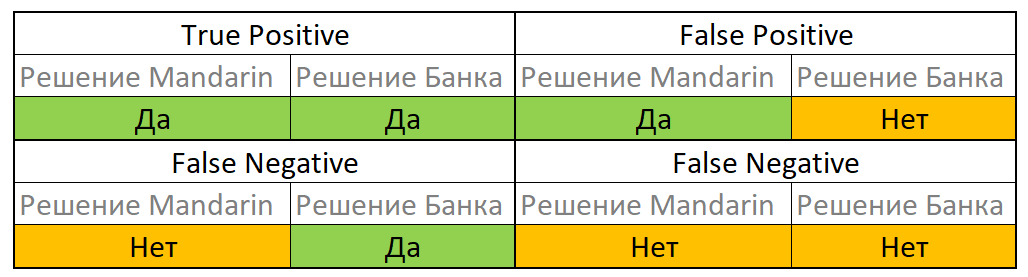

Для бизнеса Mandarin наиболее "болезнной" является ошибка 2 рода - False Positive - когда Mandarin отказывает клиенту, при этом Банк мог бы одобрить данный кредит, так как в этом случае теряется потенцильно полученная комиссия.

Также важно не совершать ошибку 1 рода - то есть не предсказывать положительное решение тем клиентам, которые получат отказ Банка, т.к. это вызовет лишние затраты ресурсов на отправку решения в Банк и получения ответа, а также учеличит TTN

Видится, что ошибки 2-го рода более "болезненные" для бизнеса, так как приводят к неполучению потенциальной прибыли, но и 1-го рода важны.

С учетом этого предлагается выбрать метрику, которая бы учитывала меру точности и полноты с приоритетом меры полноты - это F-score (beta = 2)

# Построение моделей

Попробуем несколько моделей

## Случайный лес

Построим модели для каждого банка на основании RandomForestClassifier

In [196]:
estimators = 50
depth = 100

model_random_forest_A = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size = 0.3, random_state = 42)
model_random_forest_A.fit(X_train, Y_train)
predictions = model_random_forest_A.predict(X_test)
print('BANK A')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_A.pkl'
pickle.dump(model_random_forest_A, open(filename, 'wb'))
print(' ')

model_random_forest_B = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size = 0.3, random_state = 42)
model_random_forest_B.fit(X_train, Y_train)
predictions = model_random_forest_B.predict(X_test)
print('BANK B')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_B.pkl'
pickle.dump(model_random_forest_A, open(filename, 'wb'))
print(' ')

model_random_forest_C = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_C, Y_C, test_size = 0.3, random_state = 42)
model_random_forest_C.fit(X_train, Y_train)
predictions = model_random_forest_C.predict(X_test)
print('BANK C')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_C.pkl'
pickle.dump(model_random_forest_A, open(filename, 'wb'))
print(' ')

model_random_forest_D = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_D, Y_D, test_size = 0.3, random_state = 42)
model_random_forest_D.fit(X_train, Y_train)
predictions = model_random_forest_D.predict(X_test)
print('BANK D')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_D.pkl'
pickle.dump(model_random_forest_A, open(filename, 'wb'))
print(' ')

model_random_forest_E = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X_E, Y_E, test_size = 0.3, random_state = 42)
model_random_forest_E.fit(X_train, Y_train)
predictions = model_random_forest_E.predict(X_test)
print('BANK E')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_E.pkl'
pickle.dump(model_random_forest_A, open(filename, 'wb'))
print(' ')

BANK A
(0.7676600441501104, 0.9469026548672567, 0.9046566077003122, None)
[[  24  421]
 [  78 1391]]
 
BANK B
(0.7606177606177607, 0.9484181568088033, 0.9037881766941932, None)
[[  24  434]
 [  75 1379]]
 
BANK C
(0.7520615722924684, 0.95, 0.9024937326824118, None)
[[  26  451]
 [  72 1368]]
 
BANK D
(0.7593201754385965, 0.9551724137931035, 0.9083158447009445, None)
[[  23  439]
 [  65 1385]]
 
BANK E
(0.7495854063018242, 0.9449477351916377, 0.8981322029407869, None)
[[  26  453]
 [  79 1356]]
 


Обратим внимание, что целевая метрика F-score - порядка 90%

Казалось бы, неплохой результат, особенно с учетом того, что recall = 95%

Но матрица ошибок показывает, что модель в подавляющем большинстве случаев дает положительное решение и только в малом количестве случаев - отрицательное.
При чем при изменении гиперпараметров в меньшую сторону приходим в конечном итоге к ситуации, когда модель просто перестает давать отрицательные ответы.

Такое поведение модели вызвано ваходными данными - в них как мы выяснили ранее отсутствует корреляция между признаками и целевой переменной, что говорит о том, что данные скорее всего были сгенерированы случайным образом

Попробуем другие модели, возможно получим другие результаты

## KNN

Попробуем применить метод KNN

In [197]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = 11

model_KNC_A = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size = 0.3, random_state = 42)
model_KNC_A.fit(X_train, Y_train)
predictions = model_KNC_A.predict(X_test)
print('BANK A')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_A.pkl'
pickle.dump(model_KNC_A, open(filename, 'wb'))
print(' ')


model_KNC_B = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size = 0.3, random_state = 42)
model_KNC_B.fit(X_train, Y_train)
predictions = model_KNC_B.predict(X_test)
print('BANK B')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_B.pkl'
pickle.dump(model_KNC_B, open(filename, 'wb'))
print(' ')

model_KNC_C = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_C, Y_C, test_size = 0.3, random_state = 42)
model_KNC_C.fit(X_train, Y_train)
predictions = model_KNC_C.predict(X_test)
print('BANK C')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_C.pkl'
pickle.dump(model_KNC_C, open(filename, 'wb'))
print(' ')

model_KNC_D = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_D, Y_D, test_size = 0.3, random_state = 42)
model_KNC_D.fit(X_train, Y_train)
predictions = model_KNC_D.predict(X_test)
print('BANK D')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_D.pkl'
pickle.dump(model_KNC_D, open(filename, 'wb'))
print(' ')

model_KNC_E = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_E, Y_E, test_size = 0.3, random_state = 42)
model_KNC_E.fit(X_train, Y_train)
predictions = model_KNC_E.predict(X_test)
print('BANK E')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_E.pkl'
pickle.dump(model_KNC_E, open(filename, 'wb'))
print(' ')


BANK A
(0.7674042093901781, 0.9680054458815521, 0.9199120196661923, None)
[[  14  431]
 [  47 1422]]
 
BANK B
(0.759075907590759, 0.9491059147180193, 0.9038511920356301, None)
[[  20  438]
 [  74 1380]]
 
BANK C
(0.7548913043478261, 0.9645833333333333, 0.9138157894736842, None)
[[  26  451]
 [  51 1389]]
 
BANK D
(0.7613882863340564, 0.9682758620689655, 0.9183673469387754, None)
[[  22  440]
 [  46 1404]]
 
BANK E
(0.7485127095727421, 0.9644599303135889, 0.9118460930293847, None)
[[  14  465]
 [  51 1384]]
 


Видим аналогичную ситуацию как и со случайным лесом.

При увеличении гиперпараметра количества соседей опять же приходим к ситуации, когда модель перестает давать отрицательные ответы

## Нейронная сеть

Попробуем применить нейронную сеть

In [198]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size = 0.3, random_state = 42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = Y_train.values.reshape(-1, 1)
X_test = scaler.transform(X_test)

y_train = y_train.astype('float32')

In [199]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 20, activation = 'relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units = 20, activation = 'relu'),
    tf.keras.layers.Dense(units=1, activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=[keras.metrics.Precision(thresholds = 0.5), keras.metrics.Recall(thresholds = 0.5)])

# Train the model
history = model.fit(X_train, y_train, epochs = 20, batch_size = 64)


predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int).flatten()

print('BANK A')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_A_1.pkl'
pickle.dump(model, open(filename, 'wb'))
print(' ')

Epoch 1/20
70/70 [==============================] - 1s 3ms/step - loss: 0.5907 - precision_4: 0.7580 - recall_4: 0.9556
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5606 - precision_4: 0.7577 - recall_4: 0.9947
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5504 - precision_4: 0.7567 - recall_4: 0.9994
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5449 - precision_4: 0.7563 - recall_4: 1.0000
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5394 - precision_4: 0.7563 - recall_4: 1.0000
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5358 - precision_4: 0.7565 - recall_4: 1.0000
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5318 - precision_4: 0.7566 - recall_4: 0.9994
Epoch 8/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5285 - precision_4: 0.7571 - recall_4: 0.9994
Epoch 9/20
70/70 [======================

Опять же результат аналогичный

# Выводы

В силу того, что входящие данные лишены корреляции с целевыми переменными, качественной модели построить не получается
Примененные модели по сути выдают baseline решение, всегда предсказывая положительное решение банком. В этом случае эффективность этого решения = степени одобрения соответствующим банком

Для построения рабочего решения основаннного на модели, можем использовать любую модель

Применим для этого, например KNN - сформируем модели для каждого банка и выгрузим их в файл .pkl для дальнейшего построения API

In [200]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = 11

model_KNC_A = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_A, Y_A, test_size = 0.3, random_state = 42)
model_KNC_A.fit(X_train, Y_train)
predictions = model_KNC_A.predict(X_test)
print('BANK A')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_A.pkl'
pickle.dump(model_KNC_A, open(filename, 'wb'))
print(' ')


model_KNC_B = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_B, Y_B, test_size = 0.3, random_state = 42)
model_KNC_B.fit(X_train, Y_train)
predictions = model_KNC_B.predict(X_test)
print('BANK B')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_B.pkl'
pickle.dump(model_KNC_B, open(filename, 'wb'))
print(' ')

model_KNC_C = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_C, Y_C, test_size = 0.3, random_state = 42)
model_KNC_C.fit(X_train, Y_train)
predictions = model_KNC_C.predict(X_test)
print('BANK C')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_C.pkl'
pickle.dump(model_KNC_C, open(filename, 'wb'))
print(' ')

model_KNC_D = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_D, Y_D, test_size = 0.3, random_state = 42)
model_KNC_D.fit(X_train, Y_train)
predictions = model_KNC_D.predict(X_test)
print('BANK D')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_D.pkl'
pickle.dump(model_KNC_D, open(filename, 'wb'))
print(' ')

model_KNC_E = KNeighborsClassifier(n_neighbors = neighbors)
X_train, X_test, Y_train, Y_test = train_test_split(X_E, Y_E, test_size = 0.3, random_state = 42)
model_KNC_E.fit(X_train, Y_train)
predictions = model_KNC_E.predict(X_test)
print('BANK E')
print(precision_recall_fscore_support(Y_test, predictions, average='binary', beta = 2))
print(confusion_matrix(Y_test, predictions))
filename = 'model_E.pkl'
pickle.dump(model_KNC_E, open(filename, 'wb'))
print(' ')


BANK A
(0.7674042093901781, 0.9680054458815521, 0.9199120196661923, None)
[[  14  431]
 [  47 1422]]
 
BANK B
(0.759075907590759, 0.9491059147180193, 0.9038511920356301, None)
[[  20  438]
 [  74 1380]]
 
BANK C
(0.7548913043478261, 0.9645833333333333, 0.9138157894736842, None)
[[  26  451]
 [  51 1389]]
 
BANK D
(0.7613882863340564, 0.9682758620689655, 0.9183673469387754, None)
[[  22  440]
 [  46 1404]]
 
BANK E
(0.7485127095727421, 0.9644599303135889, 0.9118460930293847, None)
[[  14  465]
 [  51 1384]]
 
